<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
fullpath = glob.glob('../../data_final/SM_HEMT.pkl')
full = pickle.load(open(fullpath[0],'rb'))
full.keys()

dict_keys(['allon', 'HEMToff'])

In [4]:
allon = full['allon']
HEMToff = full['HEMToff']

In [5]:
dpi = 1000
annsz = 8
figtextsize=10

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

In [7]:
allon['Frequency (Hz)'][len(allon)//2]

7500000000.0

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


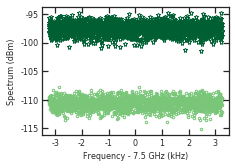

In [8]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(8.5, 6))

plt.plot(
    (allon['Frequency (Hz)'] - allon['Frequency (Hz)'][len(allon) // 2]) / 1e3,
    allon['Spectrum (dBm)'],
    '*',
    c=cmap(0.1),
    markerfacecolor='none',
    label=r'HEMT on',
    zorder=-1)
plt.plot(
    (HEMToff['Frequency (Hz)'] - HEMToff['Frequency (Hz)'][len(HEMToff) // 2])
    / 1e3,
    HEMToff['Spectrum (dBm)'],
    '.',
    c=cmap(0.5),
    markerfacecolor='none',
    label=r'HEMT off',
    zorder=-1)
plt.xlim(-3.5, 3.5)
plt.xlabel('Frequency - 7.5 GHz (kHz)')
plt.ylabel('Spectrum (dBm)')

# axa.text(-0.16,0.98, '(a)', fontsize=figtextsize,color='black', weight='bold', transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
# axb.text(-0.13,0.98, '(b)', fontsize=figtextsize,color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('SM_HEMT.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()